Compute the time evolution of a 2 ion system contructed to simulate electron transfer. @author: zhumj

Reproduce the result in Schlawin et. al. PRXQuantum Paper:
https://journals.aps.org/prxquantum/abstract/10.1103/PRXQuantum.2.010314


In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import Qsim.operator.spin as spin
import Qsim.operator.phonon as phon
import Qsim.ion_chain.transfer.elec_transfer as etrans
from  Qsim.ion_chain.ion_system import *
import Qsim.operator.spin_phonon as sp_op
import Qsim.ion_chain.interaction.dissipation as disp
plt.rcParams['figure.dpi']= 200

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
#%%
'''
parameters of the system, use the same parameter in quantum regime 
'''    
delta = 20 #detuning from com mode
ion_sys = ions(trap_config = {'N':2,'fx':2,'fz':1}) #construct a two ion system using class ions
ion_sys.coolant = [1] #ion 2 as coolant
ion_sys.active_phonon = [[0]] #consider only com mode
ion_sys.active_spin = [0]
ion_sys.pcut = [[20]]
ion_sys.update_all(print_text = False)

Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space setup
Phonon space setups are consistent
_____________________________________________________________
Phonon space parameters updated
Cooling parameters updated
Trap parametric modulation updated
Ions class object initialized.


In [4]:
laser1 = Laser()
laser1.Omega_eff = 70
laser1.wavevector = 1 
laser1.laser_couple = [0]
laser1.mu = 1e3*ion_sys.fx-delta
laser1.list_para()

Laser parameters updated
Lasers class object initialized.
                                                                 
********************Parameters of Laser Drive************************
Vibrational degree of freedom couples to the laser: Transverse (Radial x)
index of ions that couple to the laser field:  [0]
Effective rabi frequency  70  [kHz]
Effective laser frequency  1980.0  [kHz]
Laser phase phis 0.0
(input in rad but displayed in degs)


In [7]:
Omegax = 0.01*np.abs(delta)
deltaE = -5*np.abs(delta) #note site energy difference is negative by definition  
'''
simulation with 1 mode, reproduce curve C in Fig 3(B)
'''
elist = [sp_op.spin_measure(ion_sys,[0,1])]
#solve time evolution for a single energy splitting
H0  = etrans.H_res(Omegax,deltaE,ion_sys,laser1,i_type=0)
clist1 = disp.cooling(ion_sys,gamma_list = [0.05*np.abs(delta)/(2*np.pi),0],
                      nbar_list = [0.01],df=1, normalized = False)
rho0 = sp_op.rho_thermal(ion_sys, nbar_list=[[0.01]],s_state=[0],ket = False)
tplot = np.arange(0,200,0.1)
times = tplot*2*np.pi/(2*np.pi*np.abs(delta))
print("solving time evolution (1 mode) for deltaE =", deltaE)
result = mesolve(H0,rho0,times,clist1,elist,progress_bar=True,options=Options(nsteps=100000))

solving time evolution (1 mode) for deltaE = -100
10.0%. Run time:   0.60s. Est. time left: 00:00:00:05
20.0%. Run time:   1.20s. Est. time left: 00:00:00:04
30.0%. Run time:   1.78s. Est. time left: 00:00:00:04
40.0%. Run time:   2.37s. Est. time left: 00:00:00:03
50.0%. Run time:   2.96s. Est. time left: 00:00:00:02
60.0%. Run time:   3.57s. Est. time left: 00:00:00:02
70.0%. Run time:   4.17s. Est. time left: 00:00:00:01
80.0%. Run time:   4.77s. Est. time left: 00:00:00:01
90.0%. Run time:   5.37s. Est. time left: 00:00:00:00
Total run time:   5.95s


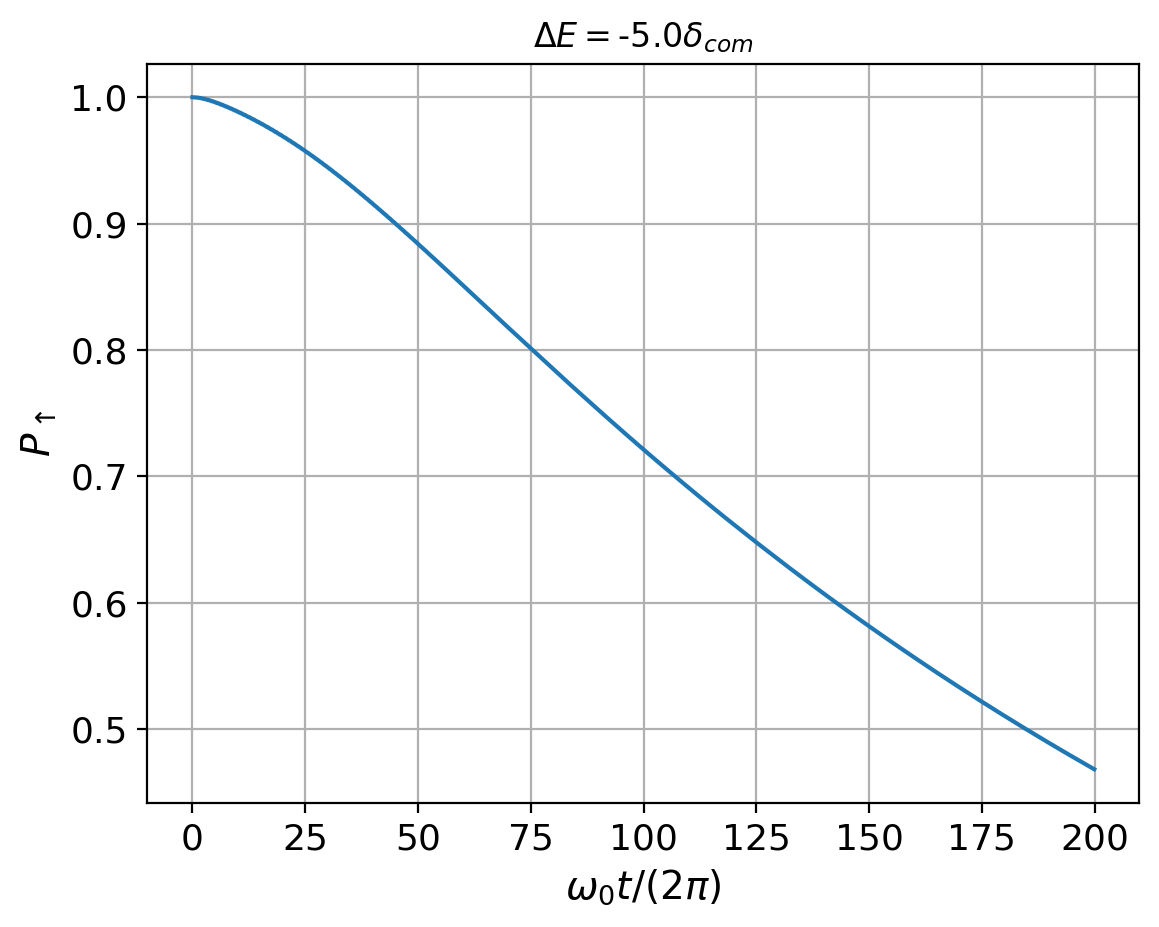

In [8]:
#%%
#extract ground state population
rhoee1 = result.expect[0]
plt.clf()
plt.plot(tplot,rhoee1)
title = r'$\Delta E = $' + str(deltaE/delta)+r'$\delta_{com}$'
plt.xlabel(r'$\omega_0t/(2\pi)$',fontsize = 14)
plt.ylabel(r'$P_{\uparrow}$',fontsize = 14)
plt.title(title)
plt.grid()   
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
plt.show()